In [1]:
import numpy as np
import pandas as pd
import datetime as dt

pd.set_option('display.max_rows', 16)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 9.0)
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import gc

In [2]:
import matplotlib.ticker as ticker

In [3]:
plt.rcParams['figure.figsize'] = (16.0, 9.0)

# Information Coefficient Analysis

In [4]:
ret_df = pd.read_pickle('./data/factor_exposure/all_exposure.pkl')

In [5]:
ret_df

,secID,ret_date,tradeDate,ret,rf,exret,ym,mktcap,size,rev,beta,bm,illiq,illiq_12m,mom_date,mom,vol,ivol,vol_clip,ivol_clip
0,000001.XSHE,2007-07,2007-06-29,0.316497,0.002481,0.314016,2007-06,4.266117e+10,24.476555,NaN,0.4614,0.123739,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,000001.XSHE,2007-08,2007-07-31,0.048855,0.002404,0.046451,2007-07,5.616330e+10,24.751529,0.314016,0.6423,0.093992,0.000040,NaN,2007-06,NaN,0.042521,NaN,0.042521,NaN
2,000001.XSHE,2007-09,2007-08-31,0.052105,0.002621,0.049484,2007-08,5.890714e+10,24.799228,0.046451,0.7722,0.097085,0.000020,NaN,2007-07,NaN,0.033926,NaN,0.033926,NaN
3,000001.XSHE,2007-10,2007-09-28,0.201851,0.003095,0.198756,2007-09,6.197651e+10,24.850021,0.049484,0.7596,0.092276,0.000025,NaN,2007-08,NaN,0.023872,NaN,0.023872,NaN
4,000001.XSHE,2007-11,2007-10-31,-0.249116,0.003780,-0.252896,2007-10,7.448652e+10,25.033884,0.198756,0.7988,0.083411,0.000030,NaN,2007-09,NaN,0.035921,NaN,0.035921,NaN
5,000001.XSHE,2007-12,2007-11-30,0.069845,0.003011,0.066834,2007-11,5.593078e+10,24.747381,-0.252896,0.9560,0.111084,0.000048,NaN,2007-10,NaN,0.033184,NaN,0.033184,NaN
6,000001.XSHE,2008-01,2007-12-28,-0.137306,0.002949,-0.140255,2007-12,6.574629e+10,24.909069,0.066834,0.9468,0.094476,0.000025,NaN,2007-11,NaN,0.027254,NaN,0.027254,NaN
7,000001.XSHE,2008-02,2008-01-31,-0.004504,0.002946,-0.007450,2008-01,5.850212e+10,24.792329,-0.140255,0.9654,0.109513,0.000039,NaN,2007-12,NaN,0.037722,0.013266,0.037722,0.013266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504872,900957.XSHG,2021-09,2021-08-31,0.089869,0.002033,0.087837,2021-08,1.116880e+08,18.531220,-0.060402,NaN,NaN,0.067321,0.071830,2021-07,0.183971,0.012268,0.008334,0.012268,0.008334


In [6]:
ic_illiq = ret_df.groupby('ret_date')[['exret','illiq']].corr(method='spearman')
ic_illiq.reset_index(inplace=True)
ic_illiq

,ret_date,level_1,exret,illiq
0,2007-04,exret,1.000000,-0.114849
1,2007-04,illiq,-0.114849,1.000000
2,2007-05,exret,1.000000,0.033204
3,2007-05,illiq,0.033204,1.000000
4,2007-06,exret,1.000000,-0.060844
5,2007-06,illiq,-0.060844,1.000000
6,2007-07,exret,1.000000,0.201833
7,2007-07,illiq,0.201833,1.000000
...,...,...,...,...
352,2021-12,exret,1.000000,0.195465


In [7]:
ic_illiq = ic_illiq[ic_illiq['level_1'] != 'illiq'].drop(['exret','level_1'],axis=1)

In [8]:
ic_illiq

,ret_date,illiq
0,2007-04,-0.114849
2,2007-05,0.033204
4,2007-06,-0.060844
6,2007-07,0.201833
8,2007-08,-0.191447
10,2007-09,-0.016126
12,2007-10,0.002307
14,2007-11,0.396168
...,...,...
344,2021-08,0.062304


In [9]:
ic_illiq.set_index('ret_date',inplace=True)

In [10]:
# ic_illiq.index = ic_illiq.index.to_timestamp()

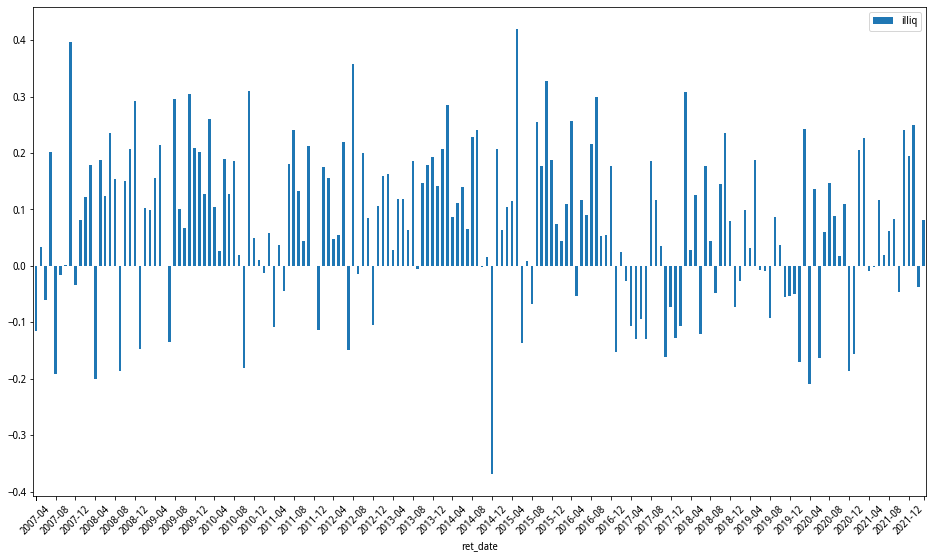

In [11]:
# fig, ax = plt.subplots()
# plt.bar(ic_illiq.index, ic_illiq['illiq'])
# plt.gca().xaxis.set_major_locator(dates.MonthLocator())
# plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%b\n%Y"))
# # fig.autofmt_xdate()
# plt.show()
ax = ic_illiq.plot.bar(rot=45)
positions = [i if not i%4 else 0 for i in ax.get_xticks()]
positions.append(ax.get_xticks()[-1])
positions
ax.set_xticks(positions)
ax.set_xticklabels([t if not i%4 else "" for i,t in enumerate(ax.get_xticklabels())])
# ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(2.5))
plt.show()

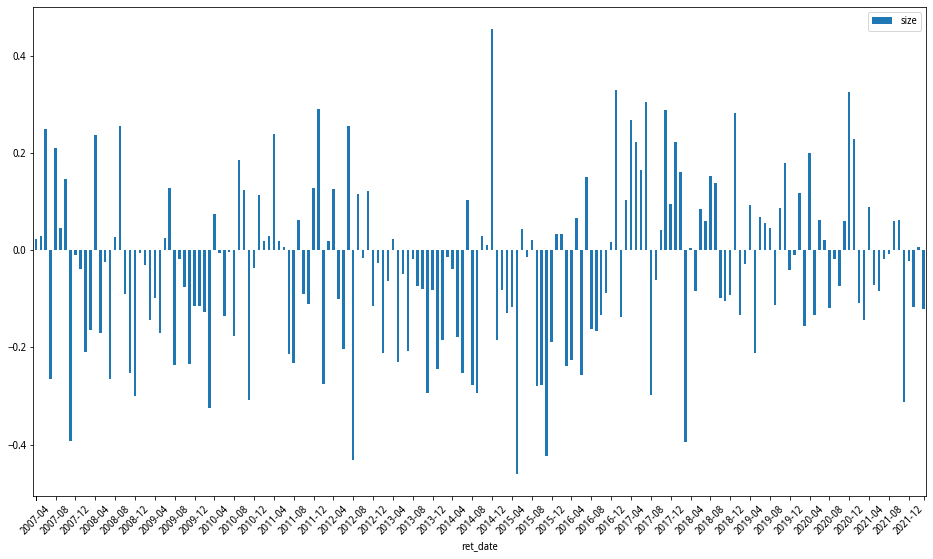

In [12]:
ic_size = ret_df.groupby('ret_date')[['exret','size']].corr(method='spearman')
ic_size.reset_index(inplace=True)
ic_size = ic_size[ic_size['level_1'] != 'size'].drop(['exret','level_1'],axis=1)
ic_size.set_index('ret_date',inplace=True)
ax = ic_size.plot.bar(rot=45)
positions = [i if not i%4 else 0 for i in ax.get_xticks()]
positions.append(ax.get_xticks()[-1])
positions
ax.set_xticks(positions)
ax.set_xticklabels([t if not i%4 else "" for i,t in enumerate(ax.get_xticklabels())])
plt.show()

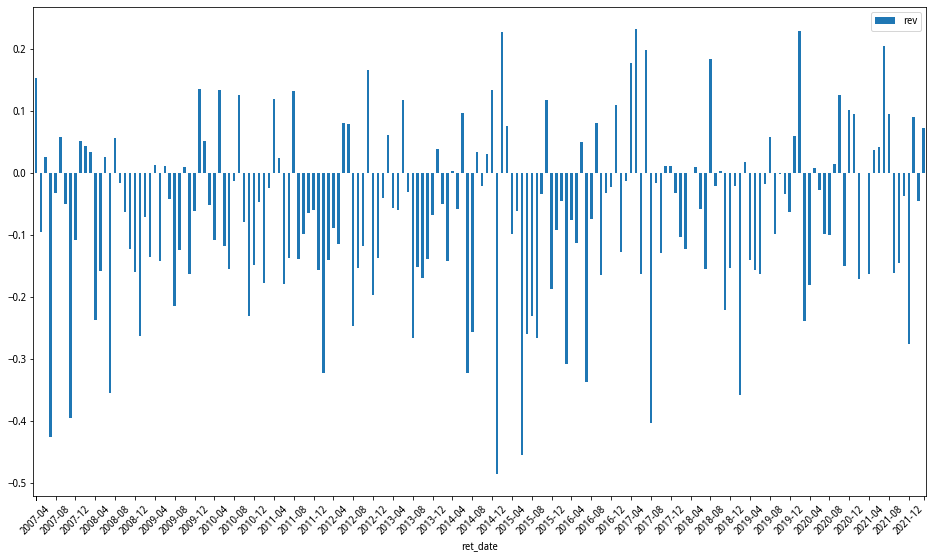

In [13]:
ic_rev = ret_df.groupby('ret_date')[['exret','rev']].corr(method='spearman')
ic_rev.reset_index(inplace=True)
ic_rev = ic_rev[ic_rev['level_1'] != 'rev'].drop(['exret','level_1'],axis=1)
ic_rev.set_index('ret_date',inplace=True)
ax = ic_rev.plot.bar(rot=45)
positions = [i if not i%4 else 0 for i in ax.get_xticks()]
positions.append(ax.get_xticks()[-1])
positions
ax.set_xticks(positions)
ax.set_xticklabels([t if not i%4 else "" for i,t in enumerate(ax.get_xticklabels())])
plt.show()

In [14]:
cols = ['beta','size','bm','mom','rev','illiq','ivol']
ic_df = pd.DataFrame()
for col in cols:
    temp = ret_df.groupby('ret_date')[['exret',col]].corr(method='spearman')
    temp.reset_index(inplace=True)
    ic_df[col] = temp[temp['level_1'] != col].drop(['exret','level_1','ret_date'],axis=1)[col].values

In [15]:
ic_df.index = np.sort(ret_df['ret_date'].unique().dropna())

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f460e67acd0>,
      dtype=object)

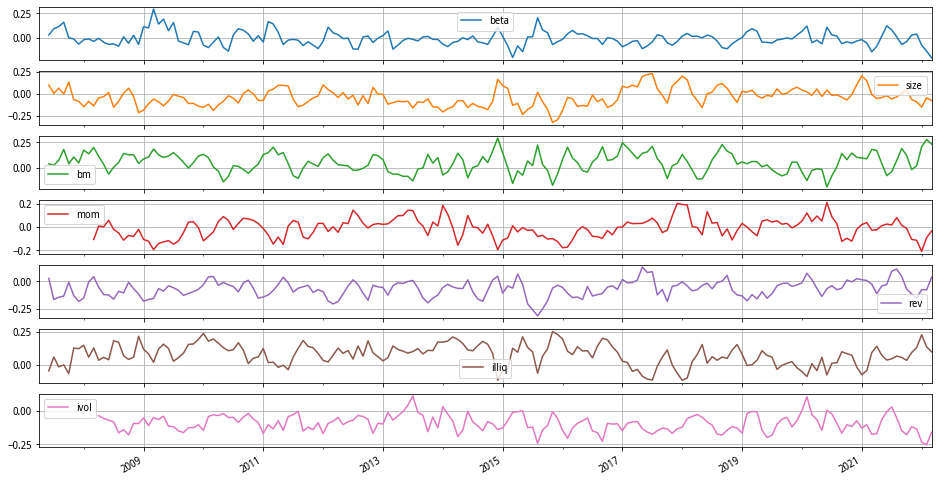

In [16]:
ic_df[cols].rolling(3).mean().plot(subplots=True,grid=True)

information ratio = IC.mean()/IC.std()

In [17]:
# Information ratio
ic_df.apply(lambda x: x.mean()/x.std())

beta    -0.069800
size    -0.226358
bm       0.316642
mom     -0.077611
rev     -0.477104
illiq    0.530235
ivol    -0.714804
dtype: float64

# Fund performance

## Fund return data

In [18]:
START = '2007-01-01'
END = '2022-03-31'
# Security Id
fund_info = DataAPI.SecIDGet(assetClass="F",pandas="1")

In [19]:
fund_info

,secID,ticker,secShortName,cnSpell,exchangeCD,assetClass,listStatusCD,listDate,transCurrCD,ISIN,partyID,delistDate
0,000001.OFCN,000001,华夏成长,HXCZ,NaN,F,UN,NaN,CNY,NaN,26812.0,NaN
1,000003.OFCN,000003,中海可转债债券-A,ZHKZZZQ-A,NaN,F,UN,NaN,CNY,NaN,16550.0,NaN
2,000004.OFCN,000004,中海可转债债券-C,ZHKZZZQ-C,NaN,F,UN,NaN,CNY,NaN,16550.0,NaN
3,000005.OFCN,000005,嘉实增强信用定开债券,JSZQXYDKZQ,NaN,F,UN,NaN,CNY,NaN,26817.0,NaN
4,000006.OFCN,000006,西部利得量化成长混合-A,XBLDLHCZHH-A,NaN,F,UN,NaN,CNY,NaN,40283.0,NaN
5,000007.OFCN,000007,鹏华国有企业债债券,PHGYQYZZQ,NaN,F,UN,NaN,CNY,NaN,26816.0,NaN
6,000008.OFCN,000008,嘉实中证500ETF联接-A,JSZZ500ETFLJ-A,NaN,F,UN,NaN,CNY,NaN,26817.0,NaN
7,000009.OFCN,000009,易方达天天理财货币-A,YFDTTLCHB-A,NaN,F,UN,NaN,CNY,NaN,26932.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
21154,970133.OFCN,970133,东证融汇添添益中短债债券-C,DZRHTTYZDZZQ-C,NaN,F,UN,NaN,CNY,NaN,76920.0,NaN


In [20]:
fund_id = ['110022','009550','001938','009341',
           '000751','004997','009863','001714',
           '001410','004851','005827','110011',
           '260108','163402','320007','163417',
           '001511','161728','161005','161131']
# fund_id = [id_+'.OFCN' for id_ in fund_id]

In [21]:
fund_name = fund_info.loc[fund_info['ticker'].isin(fund_id),['ticker','secShortName']]
fund_name

,ticker,secShortName
716,000751,嘉实新兴产业股票
1363,001410,信达澳银新能源产业股票
1457,001511,兴全新视野灵活配置定开混合
1677,001714,工银瑞信文体产业股票-A
1911,001938,中欧时代先锋股票-A
4930,004851,广发医疗保健股票-A
5069,004997,广发高端制造股票-A
5904,005827,易方达蓝筹精选混合
...,...,...
17463,163402,兴全趋势投资混合(LOF)


In [22]:
fund_name = fund_name.drop_duplicates('ticker')
fund_name

,ticker,secShortName
716,000751,嘉实新兴产业股票
1363,001410,信达澳银新能源产业股票
1457,001511,兴全新视野灵活配置定开混合
1677,001714,工银瑞信文体产业股票-A
1911,001938,中欧时代先锋股票-A
4930,004851,广发医疗保健股票-A
5069,004997,广发高端制造股票-A
5904,005827,易方达蓝筹精选混合
...,...,...
15407,110022,易方达消费行业股票


In [23]:
fund_df = pd.read_csv('./data/Fund_NAV_Month.csv',dtype={'Symbol':str})
fund_df

,TradingDate,TradingMonth,Symbol,NAV,ReturnNAV
0,2001-12-28,2001-12,000001,1.0000,0.0000
1,2002-01-31,2002-01,000001,1.0020,0.0020
2,2002-02-28,2002-02,000001,1.0130,0.0110
3,2002-03-31,2002-03,000001,1.0230,0.0099
4,2002-04-30,2002-04,000001,1.0460,0.0225
5,2002-05-31,2002-05,000001,1.0270,-0.0182
6,2002-06-30,2002-06,000001,1.0730,0.0448
7,2002-07-31,2002-07,000001,1.0450,-0.0261
...,...,...,...,...,...
774381,2021-07-30,2021-07,980003,1.4812,0.0052


In [24]:
top_fund_df = fund_df[fund_df['Symbol'].isin(fund_id)].copy()

In [25]:
top_fund_df['Symbol'].nunique()

20

In [26]:
top_fund_df.rename(columns={'Symbol':'ticker','TradingMonth':'ret_date','ReturnNAV':'ret'},inplace=True)

In [27]:
top_fund_df = pd.merge(top_fund_df, fund_name, on='ticker')

In [28]:
top_fund_df = top_fund_df[['ret_date','ticker','secShortName','ret']].copy()

In [29]:
top_fund_df['ret_date'] = pd.to_datetime(top_fund_df['ret_date']).dt.to_period('M')

In [30]:
top_fund_df

,ret_date,ticker,secShortName,ret
0,2014-09,000751,嘉实新兴产业股票,0.0000
1,2014-10,000751,嘉实新兴产业股票,0.0090
2,2014-11,000751,嘉实新兴产业股票,0.0445
3,2014-12,000751,嘉实新兴产业股票,-0.0369
4,2015-01,000751,嘉实新兴产业股票,0.1100
5,2015-02,000751,嘉实新兴产业股票,0.0504
6,2015-03,000751,嘉实新兴产业股票,0.1634
7,2015-04,000751,嘉实新兴产业股票,0.1434
...,...,...,...,...
1785,2021-07,320007,诺安成长混合,0.2288


## Factor return data

In [31]:
# factor_ret = pd.read_pickle('./data/factors/factors_all.pkl')
factor_ret = pd.read_pickle('./data/factors/factors_all_long_only.pkl')

In [32]:
factor_ret

,rf,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
ret_date,,,,,,,
2008-02,0.002946,0.024010,0.106350,0.060789,0.059612,0.048717,0.060142
2008-03,0.002746,-0.195480,-0.185605,-0.204875,-0.177674,-0.184564,-0.157342
2008-04,0.002862,0.022519,-0.073984,-0.008138,0.026001,-0.039478,-0.021866
2008-05,0.002953,-0.080798,-0.020726,-0.056888,-0.038600,-0.027371,-0.050738
2008-06,0.003113,-0.236014,-0.258596,-0.240880,-0.249542,-0.207909,-0.222131
2008-07,0.002806,0.014972,0.110389,0.072120,0.084431,0.084488,0.068393
2008-08,0.002681,-0.170063,-0.234635,-0.187086,-0.205410,-0.189043,-0.163784
2008-09,0.002889,-0.067913,-0.088250,-0.068698,-0.063282,-0.080665,-0.086935
...,...,...,...,...,...,...,...


In [33]:
reg_df = pd.merge(factor_ret.reset_index(), top_fund_df, on='ret_date')

In [34]:
reg_df['exret'] = reg_df['ret']-reg_df['rf']

In [35]:
reg_df

,ret_date,rf,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long,ticker,secShortName,ret,exret
0,2008-02,0.002946,0.024010,0.106350,0.060789,0.059612,0.048717,0.060142,161005,富国天惠精选成长混合(LOF)-A,0.0045,0.001554
1,2008-02,0.002946,0.024010,0.106350,0.060789,0.059612,0.048717,0.060142,163402,兴全趋势投资混合(LOF),0.0026,-0.000346
2,2008-02,0.002946,0.024010,0.106350,0.060789,0.059612,0.048717,0.060142,260108,景顺长城新兴成长混合,0.0031,0.000154
3,2008-03,0.002746,-0.195480,-0.185605,-0.204875,-0.177674,-0.184564,-0.157342,161005,富国天惠精选成长混合(LOF)-A,-0.2830,-0.285746
4,2008-03,0.002746,-0.195480,-0.185605,-0.204875,-0.177674,-0.184564,-0.157342,163402,兴全趋势投资混合(LOF),-0.1038,-0.106546
5,2008-03,0.002746,-0.195480,-0.185605,-0.204875,-0.177674,-0.184564,-0.157342,260108,景顺长城新兴成长混合,-0.1344,-0.137146
6,2008-04,0.002862,0.022519,-0.073984,-0.008138,0.026001,-0.039478,-0.021866,161005,富国天惠精选成长混合(LOF)-A,0.0289,0.026038
7,2008-04,0.002862,0.022519,-0.073984,-0.008138,0.026001,-0.039478,-0.021866,163402,兴全趋势投资混合(LOF),0.0463,0.043438
...,...,...,...,...,...,...,...,...,...,...,...,...
1711,2022-02,0.001921,0.010633,0.049548,0.034011,0.050488,0.039255,0.035960,110022,易方达消费行业股票,-0.0211,-0.023021


In [36]:
# results = {}
# for fund in fund_id:
#     df_ = reg_df[reg_df['ticker'] == fund].copy()
#     X = df_[['exmktret','SMB','HML','rev','illiq','ivol']]
#     y = df_['exret']
#     X = sm.add_constant(X)
#     reg = sm.OLS(y, X).fit().get_robustcov_results(cov_type='HAC', maxlags=4)
#     results[fund] = pd.DataFrame([reg.params,reg.tvalues],columns=['alpha','exmktret','SMB','HML','rev','illiq','ivol'],
#                                   index=['coefs','tvalues'])
results = {}
for fund in fund_id:
    df_ = reg_df[reg_df['ticker'] == fund].copy()
    X = df_[['exmktret','small_only','high_only','rev_long','illiq_long','ivol_long']]
    y = df_['exret']
    X = sm.add_constant(X)
    reg = sm.OLS(y, X).fit().get_robustcov_results(cov_type='HAC', maxlags=4)
    results[fund] = pd.DataFrame([reg.params,reg.tvalues],columns=['alpha','exmktret','small_only','high_only','rev_long','illiq_long','ivol_long'],
                                  index=['coefs','tvalues'])

In [37]:
for fund in fund_id[0:10]:
    print(fund_name.loc[fund_name['ticker']==fund,'secShortName'].values)
    display(results[fund])
print('#################'*5)
for fund in fund_id[10:20]:
    print(fund_name.loc[fund_name['ticker']==fund,'secShortName'].values)
    display(results[fund])

['易方达消费行业股票']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,0.004232,0.882684,-0.331372,-0.929381,0.463787,0.303213,0.350980
tvalues,0.972255,4.925441,-1.291826,-2.308913,2.156502,1.157880,0.896414


['汇添富开放视野中国优势六个月持有期股票-A']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,0.004956,0.834559,-0.589578,-0.040776,0.726693,0.391443,-0.969102
tvalues,0.711968,2.983790,-2.475614,-0.090614,2.055199,0.712029,-2.197731


['中欧时代先锋股票-A']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,0.009180,1.135847,-0.106902,-0.178939,0.538569,0.523567,-1.239861
tvalues,2.411238,7.729249,-0.348268,-0.636044,2.623610,1.215374,-2.656295


['易方达均衡成长股票']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,0.010737,1.470982,-0.232457,0.003018,0.058447,1.284621,-2.143836
tvalues,1.983351,5.567900,-0.811607,0.007163,0.172085,3.064515,-5.541030


['嘉实新兴产业股票']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,0.018069,1.403525,0.399663,-1.364502,0.469708,0.465698,-0.797507
tvalues,2.987700,8.821298,1.614396,-2.302584,2.075983,1.979754,-1.324924


['广发高端制造股票-A']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,0.026918,1.894138,1.204315,-0.171495,-0.964128,-0.675030,-0.244382
tvalues,3.713931,6.909110,2.446902,-0.347104,-2.992004,-1.017413,-0.411223


['富国创新趋势股票']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,0.010011,1.687295,-0.695866,0.690826,0.332013,1.589523,-3.242383
tvalues,1.692955,5.414262,-3.045299,1.558504,1.171842,2.354914,-5.102184


['工银瑞信文体产业股票-A']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,0.019115,1.268278,0.249251,-0.727126,0.193963,0.311869,-0.832905
tvalues,5.373796,7.576191,0.897513,-1.911601,0.784477,0.993826,-1.846138


['信达澳银新能源产业股票']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,0.036674,1.255006,1.307777,0.214933,0.338165,-0.415069,-2.172297
tvalues,4.624940,4.751169,4.566140,0.495378,0.869858,-0.895624,-4.293921


['广发医疗保健股票-A']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,0.012321,1.487624,0.793651,-2.882005,0.375611,-0.014846,0.749286
tvalues,1.719237,6.259480,1.161212,-4.277187,0.844783,-0.019235,1.042118


#####################################################################################
['易方达蓝筹精选混合']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,0.005614,1.469751,-0.153654,-1.697112,-0.214506,0.101821,1.456082
tvalues,0.997221,8.159606,-0.321798,-3.626096,-0.562258,0.260707,2.914707


['易方达优质精选混合(QDII)']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,0.010978,1.167525,0.052118,-0.885270,0.110845,0.087850,0.100705
tvalues,2.715108,7.001727,0.253038,-2.800812,0.551572,0.404944,0.307152


['景顺长城新兴成长混合']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,0.004462,1.327396,0.189219,-1.101183,0.302216,0.307892,-0.265352
tvalues,0.975965,7.710231,0.648899,-3.214038,1.380837,1.113845,-0.588997


['兴全趋势投资混合(LOF)']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,0.002559,1.080892,0.486536,-0.192797,-0.062708,-0.133434,-0.603646
tvalues,0.641001,8.233455,2.799534,-0.754238,-0.478680,-0.698627,-2.601715


['诺安成长混合']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,0.011663,1.452627,1.386896,-0.406207,-0.097638,-0.089291,-1.630927
tvalues,1.846697,5.368559,3.839346,-0.728875,-0.359244,-0.312787,-3.163438


['兴全合宜灵活配置混合-A']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,0.00630,1.084396,0.273447,-1.096566,-0.046410,-0.013287,0.500034
tvalues,1.40001,6.483053,0.852698,-3.683356,-0.189298,-0.041495,1.142617


['兴全新视野灵活配置定开混合']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,0.010999,0.541929,-0.010474,0.339737,0.438569,0.034274,-0.925637
tvalues,3.535814,3.654870,-0.058743,1.109276,2.796332,0.097018,-2.901114


['招商瑞智优选灵活配置混合(LOF)']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,-0.000101,0.148687,-0.046473,0.038475,0.108796,0.039133,-0.196753
tvalues,-0.034418,1.544038,-0.356834,0.146792,0.468217,0.340000,-0.775523


['富国天惠精选成长混合(LOF)-A']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,0.003022,1.196394,0.325799,-0.791604,0.170369,0.359012,-0.446883
tvalues,0.842099,9.455917,1.704850,-2.467143,1.181418,1.570233,-1.315877


['易方达科润混合(LOF)']


,alpha,exmktret,small_only,high_only,rev_long,illiq_long,ivol_long
coefs,-0.002597,0.214392,0.027145,-0.326688,0.127703,0.072341,-0.050284
tvalues,-0.684013,2.631488,0.307110,-1.134939,0.696297,0.489920,-0.239682
